In [27]:
#Hrudai Battini HW 1, Part 2 Aplied Machine Learning
import numpy as np
import seaborn as sns
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [28]:
#Part 1 Titanic Dataset imports 
X = pd.read_csv("titanictrain.csv")
X_test = pd.read_csv("titanictest.csv")
lenx = len(X)
df = pd.concat([X,X_test])

In [29]:
#1P2 Pre Processing Data 
out = []
for n in df.columns:
    if df[n].count() < 300:
        out.append(n)
hold = df.drop(['Cabin','Name','Embarked','Ticket'],axis=1)

#One Hot Encoding the Categorical Variables in the dataset
df_Prep = pd.get_dummies(hold)
#Dealing with Missing Values via Interpolation
df_Prep = df_Prep.interpolate()


cols = df_Prep.columns

X_train = df_Prep.iloc[:lenx,:]
X_test = df_Prep.iloc[lenx:,:]

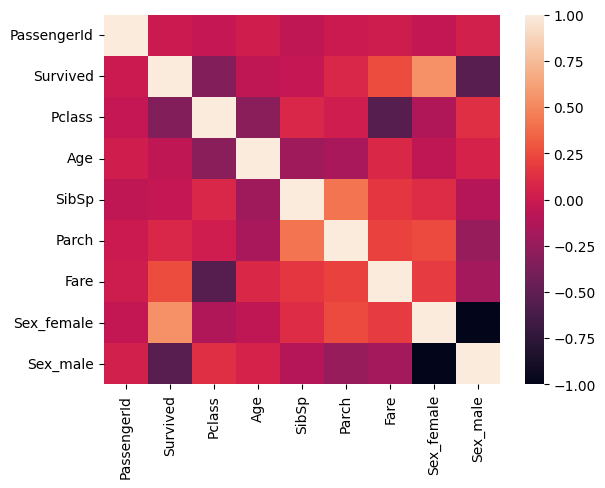

In [30]:
#2 Feature Selection 
corrMat = X_train.corr()

sns.heatmap(corrMat)
#Drop features of correlation <0.3 abs value relative to surived feature
drop_cols = [col for col in corrMat.columns if abs(corrMat['Survived'][col]) < 0.02]
#drop_cols = []
c1 = ["Survived"]
X_train_set = X_train.drop(drop_cols,axis=1)
X_train_set = X_train_set.drop(c1,axis=1)
X_test_set = X_test.drop(drop_cols,axis=1)
X_test_set = X_test_set.drop(c1,axis=1)

In [31]:
#2 Logistic Regression
#Training Model
Y_train = X_train.loc[:,"Survived"]
regr = LogisticRegression()
regr.fit(X_train_set,Y_train)

Y_train_hat = pd.DataFrame()
Y_train_hat["Survived"] = regr.predict(X_train_set)



#Testing Model
Y_test_hat = pd.DataFrame()
Y_test_hat["PassengerId"] = X_test.loc[:,"PassengerId"]
Y_test_hat["Survived"] = regr.predict(X_test_set)
Y_test_hat["Survived"] = Y_test_hat.loc[:,"Survived"].astype(int)
Y_test_hat.to_csv(path_or_buf="YtesthatTitanic.csv", sep =',',index=False)

#Error Check
r_squared = regr.score(X_train_set, Y_train)
print(r_squared)


0.7934904601571269


c:\Users\hruda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
